# Projet PAH : Déploiement IA HPML - VIT-B

# Introduction


L'objectif principal du projet PAH est d'explorer et d'expérimenter différentes approches d'optimisation et de déploiement de modèles d'intelligence artificielle. Nous avons choisi de travailler spécifiquement sur le modèle **ViT-B (Vision Transformer)**, une architecture à l'état de l'art conçue pour la classification d'images.

# Modèle utilisé : VIT

Le modèle **Vision Transformer (ViT)** est une architecture moderne adaptée de l'approche Transformer initialement développée pour le traitement du langage naturel (NLP). Contrairement aux réseaux convolutifs classiques tels que ResNet, qui reposent sur des convolutions locales successives, ViT traite les images comme des séquences de "patches" et utilise des mécanismes d'auto-attention pour capturer les relations globales au sein de l'image. Malgré ces différences, ViT partage des similitudes avec ResNet en termes de performances élevées sur des tâches de classification d’images.

ViT est largement utilisé pour ses capacités à généraliser efficacement sur de grands ensembles de données et pour sa robustesse sur des tâches complexes comme la reconnaissance d'objets ou la classification fine d’images.

Nous avons choisi ViT pour notre expérimentation en raison de sa popularité croissante, de ses performances de pointe, et surtout, parce qu'il représente un excellent candidat pour évaluer les techniques d'optimisation telles que l'élagage et la quantification dans le contexte spécifique de la programmation GPU.


# Choix et Adaptation du modèle



Pour notre expérimentation, nous avons sélectionné le modèle pré-entraîné **ViT-B** disponible sur [Hugging Face (google/vit-base-patch16-224)](https://huggingface.co/google/vit-base-patch16-224). Ce modèle a initialement été entraîné sur ImageNet pour classer des images en 1000 catégories distinctes.

Afin de simplifier notre projet, nous avons choisi de l’adapter au jeu de données **CIFAR-10**, qui comporte uniquement 10 classes différentes. Pour réaliser cette adaptation, nous avons effectué deux variantes de **fine-tuning** :

1. **Fine-tuning complet**, puis remplacement de la dernière couche (qui en sortie comporte 1000 neurones) par une couche finale de 10 neurones adaptée à CIFAR-10.  
2. **Freeze toutes les couches sauf les trois dernières**, puis remplacement de la dernière couche par une couche de 10 neurones adaptée à CIFAR-10.


Les résultats obtenus sont résumés dans le tableau ci-dessous :

| Modèle               | Précision | Temps de Fine-Tuning | Taille     |
|----------------------|----------:|----------------------:|-----------:|
| **Fine-tuning complet** | 97.27%    | 21:30                | 343.29 MB  |
| **Freeze Fine-tuning**  | 97.24%    | 10:30                | 343.29 MB  |


Compte tenu du gain significatif en temps d’entraînement (11:00) pour une perte de précision négligeable (0.03%), la méthode **Freeze Fine-tuning** a été retenue comme notre nouveau modèle de base pour les prochaines étapes d’optimisation.



Cette figure illustre la **courbe de perte** obtenue lors du **Freeze Fine-tuning** sur CIFAR-10. On observe une diminution rapide de la loss dès la première époque, suivie d’un raffinement progressif jusqu’à atteindre une valeur quasiment nulle au bout de 4 époques. Cela indique que le modèle converge efficacement même avec seulement quelques couches entraînées.



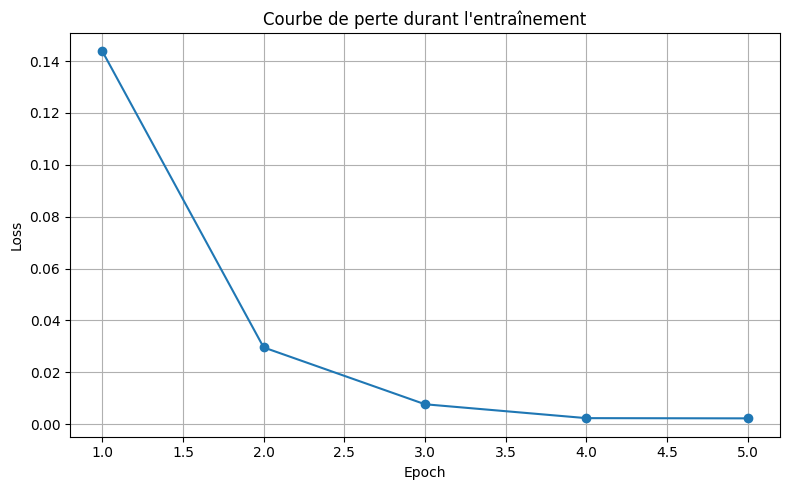

# Techniques d’optimisation

## Pruning 



Le **pruning** consiste à supprimer certaines connexions ou neurones jugés non essentiels au sein d'un réseau de neurones. L'objectif est de réduire la taille et la complexité du modèle, tout en conservant des performances proches de l'original. 

On distingue deux approches :
- **Pruning non structuré** : suppression au niveau des poids individuels les plus faibles.
- **Pruning structuré** : suppression de blocs entiers (neurones, canaux ou couches).


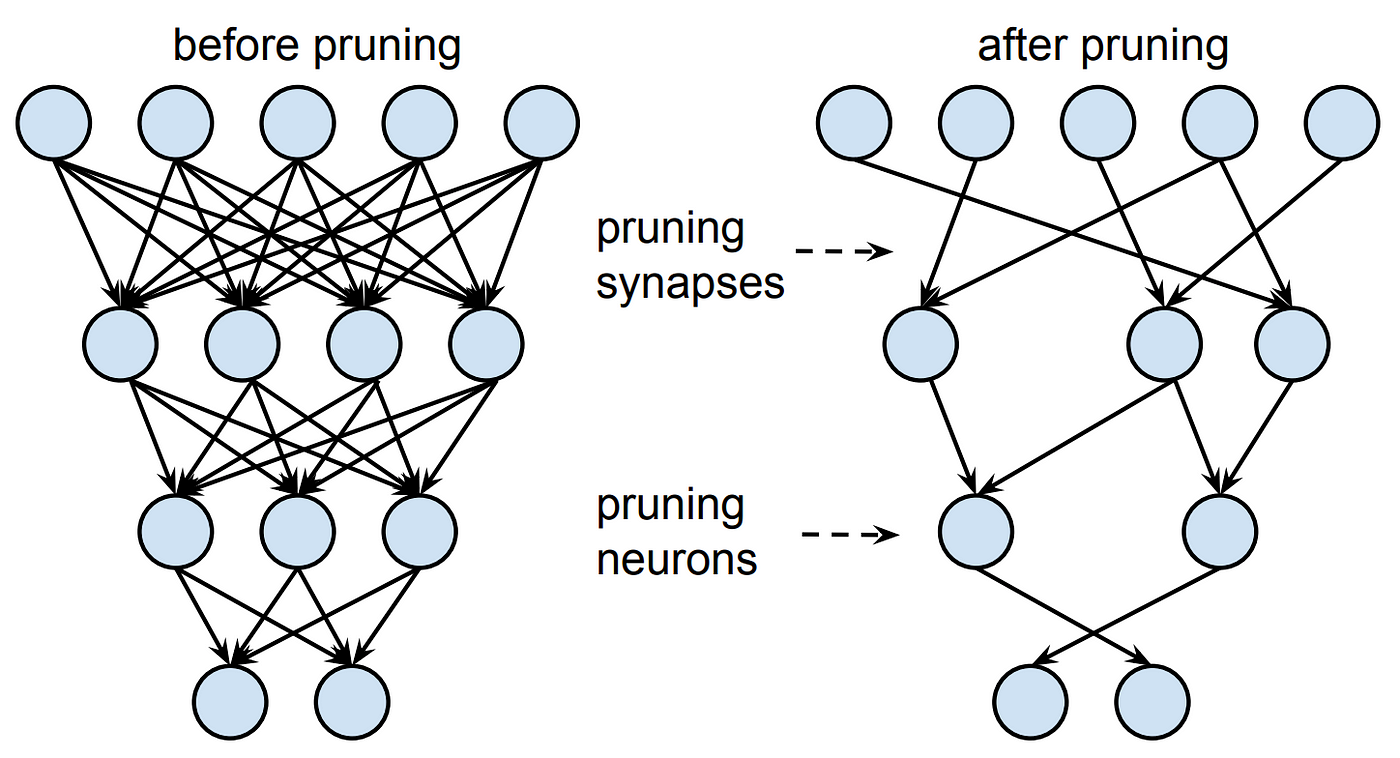


## Quantization

La **quantization** consiste à réduire la précision de représentation des poids et des activations du réseau. Cette approche diminue la taille mémoire du modèle et accélère l’inférence.

Pour réduire la précision, on convertit généralement les valeurs (poids, biais, activations) en nombres entiers (8 bits, par exemple) ou en virgule fixe, ce qui implique un arrondi et une échelle de quantification adaptées.


On peut distinguer plusieurs types de quantization :
- **Quantization dynamique** : Conversion des valeurs lors de l’inférence 
- **Quantization statique** : Conversion des valeurs avant l’exécution
- **Quantization-aware training** : Entraînement qui intègre directement les effets de la quantization pour de meilleures performances


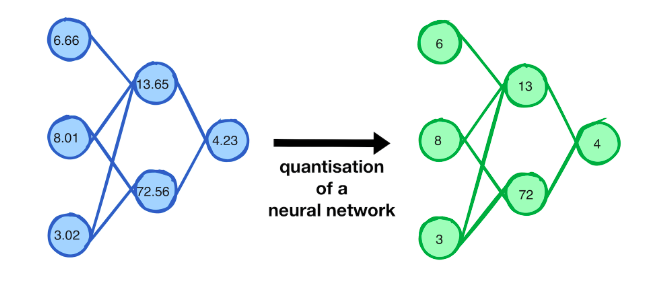

----

# Creation des models optimisé


Nous générons plusieurs variantes de ViT-B en appliquant différentes techniques d’optimisation afin d’évaluer leurs impacts sur les performances et la taille du modèle. Les principales approches incluent :

- **Pruning** : Réduction du nombre de poids ou de neurones pour diminuer la complexité du réseau.
- **Quantization** : Conversion des poids et des activations en une représentation de plus faible précision (entiers 8 bits, par exemple).

Ces variantes nous permettront d’observer et de comparer leurs caractéristiques, telles que la taille mémoire, la rapidité d’inférence (latence et throughput), et la précision finale sur notre jeu de données CIFAR-10.




---


# Comparation des models optimisé

Dans cette section, nous présentons les résultats obtenus après avoir appliqué différentes techniques d’optimisation (quantization et pruning) au modèle ViT-B adapté à CIFAR-10. Nos principaux critères d’évaluation incluent la taille mémoire, la précision sur CIFAR-10 et le temps moyen d’inférence.

## Quantization

### Quantization V1

Première version de notre modèle avec une Quantization

**Statistiques du modèle quantifié :**
- **Taille mémoire** : 88.53 MB  
- **Précision (Accuracy)** : 6.83%  
- **Temps moyen d’inférence par batch** : 516.01 ms  

Malgré une réduction importante de la taille du modèle (comparé au modèle de base), la précision chute drastiquement à 6.83%, ce qui indique une dégradation sévère des performances. Cette version quantifiée ne satisfait donc pas nos exigences en termes d’exactitude.


### Quantization V2


## Prunning

### Pruning V1

Au cours de cette première expérimentation de pruning, nous avons élagué différentes proportions de poids :

| Pruning | Sparsity | Taille (MB) | Accuracy | Inférence (ms) |
|---------|---------:|------------:|---------:|---------------:|
| **10%** | 10.00%   | 683.10      | 7.45%    | 517.92         |
| **30%** | 30.00%   | 683.10      | 6.80%    | 508.70         |
| **50%** | 50.00%   | 683.10      | 10.00%   | 519.60         |
| **70%** | 70.00%   | 683.10      | 10.00%   | 504.56         |
| **90%** | 90.00%   | 683.10      | 10.00%   | 506.01         |

Observations :
- Les tailles rapportées ne semblent pas varier malgré la suppression de 10% à 90% des poids.  
- Les précisions obtenues restent très faibles en comparaison de notre modèle de base et montrent peu de cohérence (des valeurs constantes à 10.00%).  
- Le temps d’inférence ne s’améliore pas de manière significative.

### Pruning V2

Dans cette seconde expérience, nous avons **retiré les poids nuls** du modèle, afin de réduire de façon concrète sa taille et ses connexions inutiles.


#### Résumé des modèles prunés :

| Pruning | Sparsity | Taille (MB) | Accuracy | Inférence (ms) |
|---------|---------:|------------:|---------:|---------------:|
| **10%** | 10.00%   | 343.30      | 7.45%    | 475.49         |
| **30%** | 30.00%   | 343.30      | 6.80%    | 475.14         |
| **50%** | 50.00%   | 343.30      | 10.00%   | 478.60         |
| **70%** | 70.00%   | 343.30      | 10.00%   | 466.06         |
| **90%** | 90.00%   | 343.30      | 10.00%   | 462.79         |

**Observations**  

- Les tailles rapportées ne semblent pas varier malgré la suppression de 10% à 90% des poids.  
- Les précisions obtenues restent très faibles en comparaison de notre modèle de base et montrent peu de cohérence (des valeurs constantes à 10.00%).  
- Le temps d’inférence ne s’améliore pas de manière significative.
- La suppression effective de liaisons jugées non essentielles a diminué de moitié la taille du modèle (343.30 MB).  

Au vu de ces résultats, le gain potentiel en taille ou en vitesse reste négligeable par rapport à la dégradation drastique de la précision. En conséquence, ce type de pruning ne s’avère pas satisfaisant pour le moment.


## Choix final


Au vu de ces expérimentations, les résultats apparaissent incohérents ou nettement moins performants que ceux de notre modèle de base (Freeze Fine-tuning), que ce soit pour la quantization ou le pruning. En conséquence, **nous conservons le modèle de base** pour la suite de nos travaux, car il offre un compromis bien plus favorable entre taille, précision et temps d’inférence. Nous prévoyons néanmoins d’affiner ultérieurement ces techniques d’optimisation (quantization et pruning) afin de mieux exploiter leurs avantages potentiels. 


----

# Conclusion

parler l'efficacité du model vit ()
dire que c'est meilleur que resnet 
meilleur resnet sur cifar : ResNet50 98.3% de précision: https://paperswithcode.com/paper/when-vision-transformers-outperform-resnets

meilleur VIT : un VIT-H 99.5% de précision  :https://paperswithcode.com/paper/an-image-is-worth-16x16-words-transformers-1


on comprend que c'est possible d'optimisé un model suivant le parametre taille ce qui peut etre très pour des personnes necesitant de petit model rapide (ex : particulier ou petite entreprise)


## Classement des modèles sur le jeu de données CIFAR-10


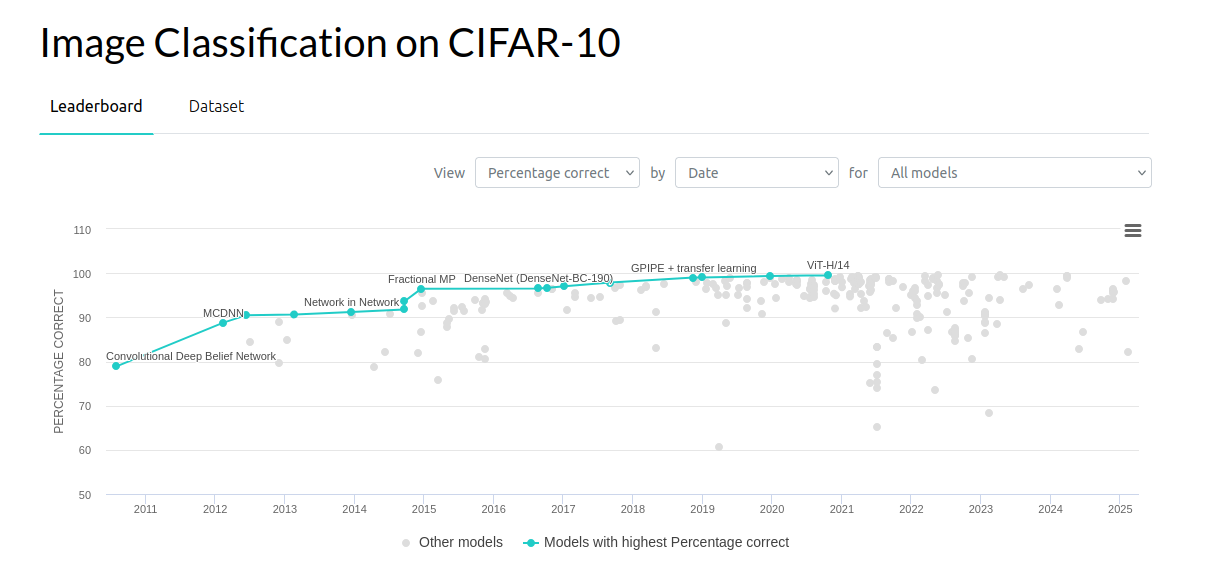
